# Visualização de Dados - IBM - Coursera


## Semana 1: Introdução às ferramentas de visualização de dados

### Por que visualizar dados?
* Análise exploratória dos dados
* Comunicação clara dos dados
* Representação não enviesada dos dados
* Usar dados como suporte a recomendações às diferentes partes envolvidas


[DarkHorse Analytics](darkhorseanalytics.com) - Consultoria - Alberta University/US (2008)
* Pilares da visualização de dados
    * Less is more effective
    * Less is more atractive
    * Less is more impactive

### Matplotlib
* Criada pelo neurobiologista John Hunter (1968-2012)
    * Análise de Eletrocorticografia (ECoG) 
* Instalação
    * $ pip3 install matplotlib
* Arquitetura
    * Backend Layer ( FigureCanvas, Renderer, Event)
    * Artist Layer (Artist)
    * Scripting Layer (pyplot)

Fonte: [The Architecture of Open Source Applications - Matplotlib](http://aosabook.org/en/matplotlib.html)

### Plot function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Plotando um marcador circular na posição (5,5)

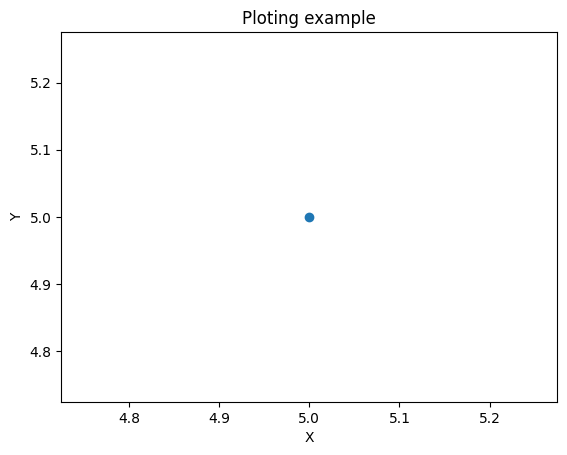

In [2]:
plt.plot(5,5,'o')
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Ploting example")
plt.show()

Utilizando matplotlib com um Pandas dataframe 

In [3]:
import pandas as pd

In [4]:
# Atribuir dados em lista
data = {''     : [1980,1981,1982,1983,1984],
        'India': [8880,8670,8147,7338,5704], 
        'China': [5123,6682,3308,1863,1527]}

In [5]:
# Criando o DataFrame
india_china_df = pd.DataFrame(data)
india_china_df

,,India,China
0,1980,8880,5123
1,1981,8670,6682
2,1982,8147,3308
3,1983,7338,1863
4,1984,5704,1527


In [6]:
india_china_df.set_index('', inplace=True)
india_china_df

,India,China
,,
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


Plotando gŕafico de linha

<AxesSubplot: >

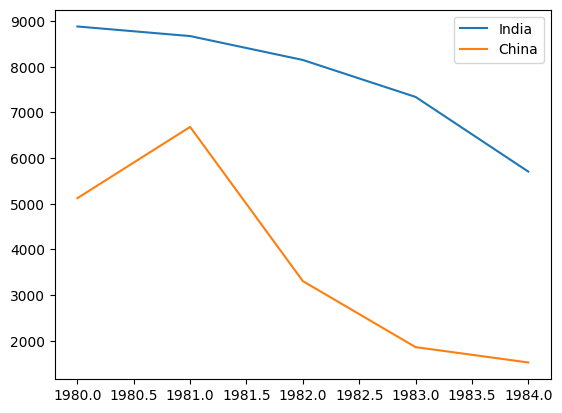

In [7]:
india_china_df.plot(kind="line")

Plotando histograma

<AxesSubplot: ylabel='Frequency'>

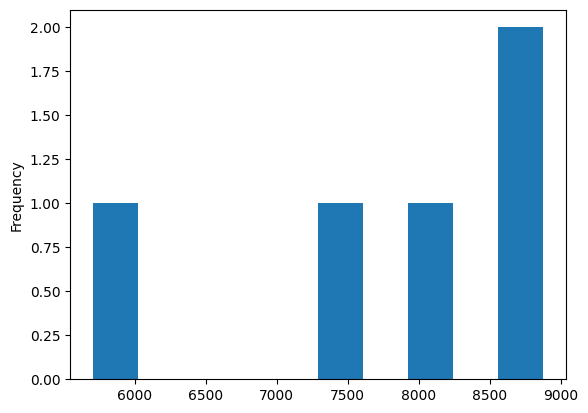

In [8]:
india_china_df['India'].plot(kind="hist")

## Semana 2: Ferramentas de visualização básicas e avançadas

### Gráfico de Área
Lendo dados de um dataframe Pandas

In [9]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')
df_can.head(5)


Data read into a pandas dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Transformação do dataframe, excluindo series não necessárias para a análise e calculando parâmetros necessários.

In [10]:
df = df_can.loc[:,['OdName','AreaName','RegName','DevName']]
df = df.join(df_can.iloc[:,9:])
df['total'] = df_can.iloc[:,9:].sum(axis=1)
df = df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'})
df_total = df
df

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


Alterando o indice da tabela

In [11]:
df.set_index('Country',inplace=True)

Gerando dataframe com ordenação crescente do total de imigrantes pelo período estudado

In [12]:
df_canada = df.sort_values(['total'], ascending=False, axis=0)
df_canada.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [13]:
years = list(map(int, range(1980,2014)))
df_top5 = df_canada.head()
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [14]:
df_top5 = df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


### Gerando plotagens de áreas

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

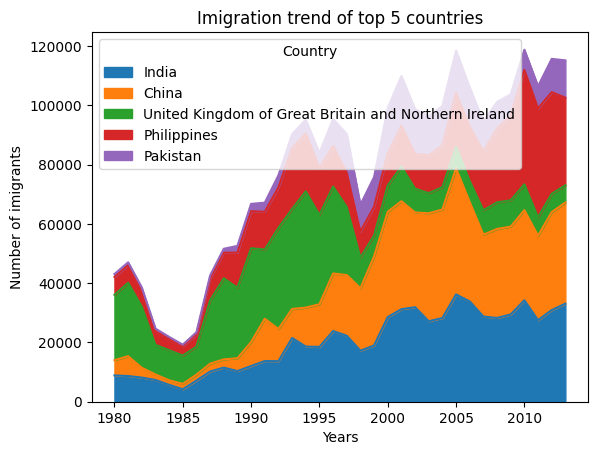

In [16]:
df_top5.plot(kind='area')

plt.title('Imigration trend of top 5 countries')
plt.ylabel('Number of imigrants')
plt.xlabel('Years')

plt.show()

Ajuste da tag referente ao Reino Unido (UK), reduzindo a extensão do texto, para melhor visualização do gráfico.

In [17]:
df_top5 = df_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK of GB-NI'})


Gráfico de linhas: Fica confusa a visualização da contribuição de cada país para o total de imigrações no intervalo de tempo.

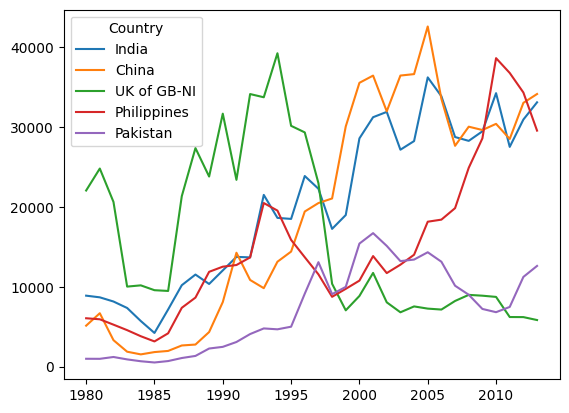

In [18]:
df_top5.plot(kind='line')
plt.show()

Gráfico de área: Soma de forma acumulativa as contribuições de cada país para o total de imigrantes por ano da análise.

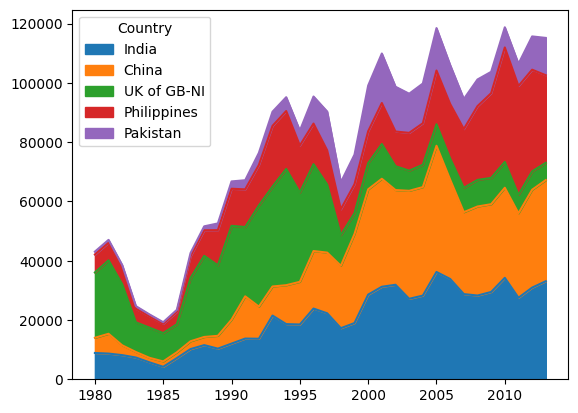

In [19]:
df_top5.plot(kind='area')
plt.show()

### Histograma

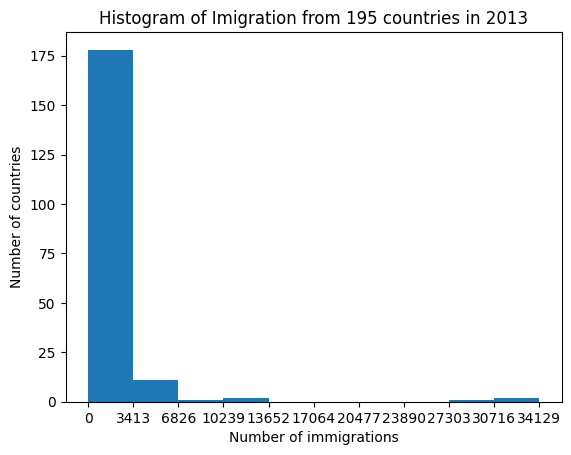

In [20]:
import numpy as np
count, bin_edges = np.histogram(df_canada[2013])
df_canada[2013].plot(kind='hist', xticks=bin_edges)

plt.title('Histogram of Imigration from 195 countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrations')
plt.show()

### Gráfico de Barras

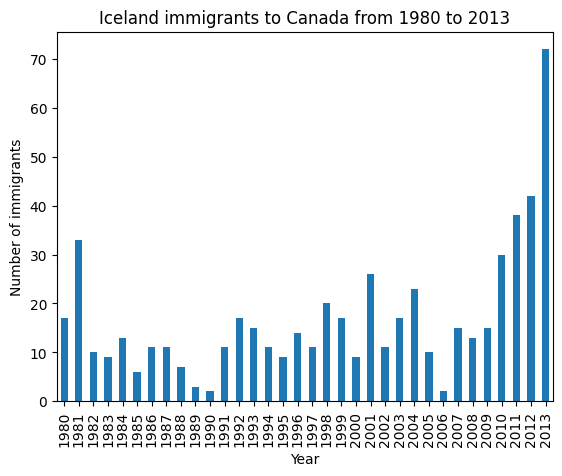

In [29]:
years = list(map(int,range(1980,2014)))
df_iceland = df_canada.loc['Iceland', years]

df_iceland.plot(kind='bar')
plt.title('Iceland immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.show()

### Gráfico de Pizza

In [30]:
df_continents = df_canada.groupby('Continent',axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


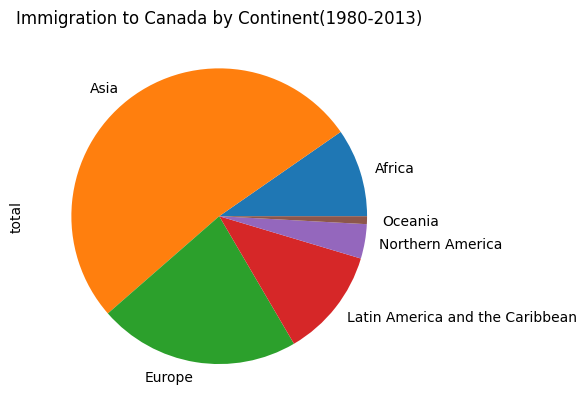

In [31]:
df_continents['total'].plot(kind='pie')
plt.title('Immigration to Canada by Continent(1980-2013)')
plt.show()

Estudo sobre gráfico de pizza
[Pie Charts](https://www.alchemer.com/resources/blog/pie-chart-or-bar-graph/)

### Box Plots
É uma maneira de representar estatisticamente a distribuição de determinados dados através de cinco dimensões:
* *Mínimum* (Mínimo): FQ - 1,5*IQR
* *First Quartile* (Primeiro quartil): 25% dos dados classificados;
* *Median* (Mediana): Mediana dos dados classificados;
* *Third Quartile* (Terceiro quartil): 75% dos dados classificados;
* *Maximum* (Máximo): TQ + 1,5*IQR

IQG: *Inter Quartile Range* (Intervalo entre quartis: 1ªQ e 3ºQ)



In [32]:
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


In [33]:
df_japan = df_canada.loc[['Japan'], years].transpose()
df_japan

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248
1987,422
1988,324
1989,494


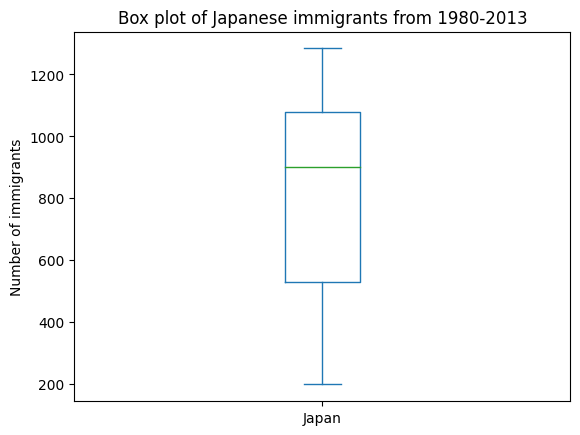

In [34]:
df_japan.plot(kind='box')
plt.title('Box plot of Japanese immigrants from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

### Scatter plot (Dispersão)
Exibe em um gráfico valores de duas variáveis, uma relacionada a outra. Normalmente uma dependente e a outra independente. O objetivo é verificar se há dependencia entre elas.

In [58]:
df_soma = df.loc[:,years]
df_soma
# df_total = df.loc[:, years].sum(axis=0)
# df_total['total'] = df.loc[:,years].sum(axis=0).transpose()
# df_total['year'] = df.loc[years]


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217


In [130]:
df_soma.loc['total'] = df_soma.loc[:,years].sum()
# df_soma.reset_index()
df_soma

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217
Zambia,11,17,11,7,16,9,15,23,44,68,...,56,91,77,71,64,60,102,69,46,59


In [131]:
df_somat = df_soma.loc['total',years]
df_somat

1980     594822
1981     663378
1982     625626
1983     453300
1984     440502
1985     419868
1986     516288
1987     808626
1988     835836
1989     986592
1990    1128324
1991    1245054
1992    1330122
1993    1332294
1994    1161990
1995    1126272
1996    1200510
1997    1157310
1998     964362
1999    1078908
2000    1300272
2001    1455858
2002    1338666
2003    1303782
2004    1392498
2005    1544742
2006    1482342
2007    1394430
2008    1458282
2009    1492608
2010    1661736
2011    1477164
2012    1537332
2013    1545222
Name: total, dtype: int64

In [142]:
df_s = pd.DataFrame()
df_s['total'] = df_somat
df_s['year'] = years
df_s = df_s.reset_index(drop=True)
df_s

,total,year
0,594822,1980
1,663378,1981
2,625626,1982
3,453300,1983
4,440502,1984
5,419868,1985
6,516288,1986
7,808626,1987
8,835836,1988
9,986592,1989


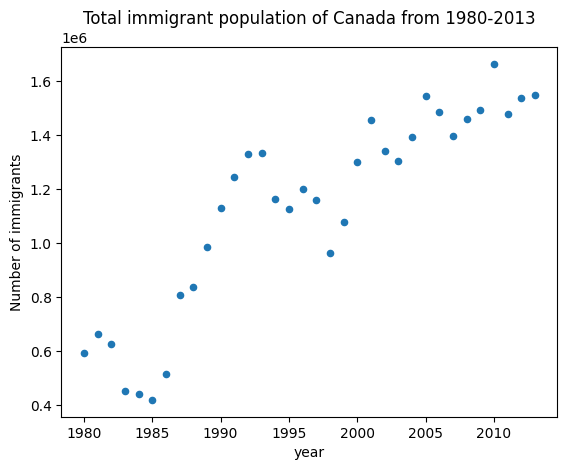

In [144]:
df_s.plot(kind='scatter',x='year',y='total')
plt.title('Total immigrant population of Canada from 1980-2013')
plt.xlabel('year')
plt.ylabel('Number of immigrants')
plt.show()

Semana 3: Visualizações avançadas e dados geoespaciais

### Waffle chart (Gráfico de Waffle)
Tem como objetivo mostrar a parte ou o progresso em relação ao todo.

### Word clouds (Nuvem de palavras)
Representa de forma gráfica a importância ou frequência com que uma palavra ocorre em um texto. Assim, uma nuvem de palavras pode mostrar o contexto ou direcionamento presente no texto analisado.

### Seaborn

In [147]:
import seaborn as sns

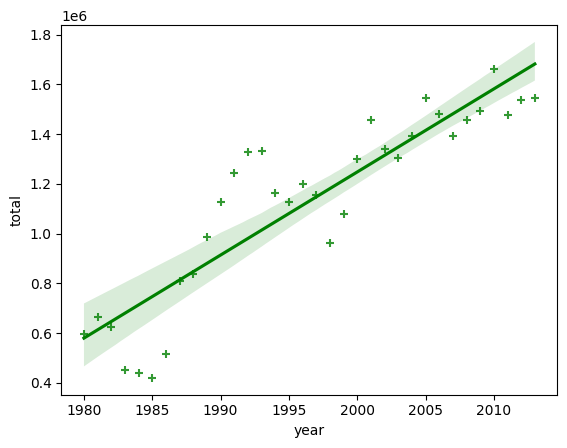

In [151]:
ax = sns.regplot(x='year',y='total', data=df_s, color='green', marker='+')

# Linha de regressão com intervalo de confiança de 95%

### Folium
Biblioteca de visualização python para dados geoespaciais, possibilitando a criação de mapas de qualquer lugar do mundo,desde que se saiba seus valores de latitude e longitude.

Com o mapa é possível inserir marcadores, clusters, mapas de níveis, etc. 


Criando um mapa mundi

In [152]:
world_map = folium.Map()
world_map

NameError: name 'folium' is not defined